In [56]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# KFold (교차 검증을 사용하기 위해)
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 교차검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가 함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import  XGBRegressor

# 머신러닝 알고리즘 - 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 머신러닝 알고리즘 - 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 저장
import pickle

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우용
# plt.rcParams['font.family'] = 'AppleGothic'   # 맥용
plt.rcParams['font.size'] = 16                  # 폰트 크기
plt.rcParams['figure.figsize'] = 10,8          # 그래프 크기
plt.rcParams['axes.unicode_minus'] = False     # - 기호 깨짐 방지


# 경고 메시지가 안나오게 하기
import warnings
warnings.filterwarnings('ignore')

평균임금빼고 전부 결측치는 모름/무응답으로 
대체

평균임금을 결과 데이터로
평균임금의 결측치가 아닌 사람의 데이터를 예측해서 ..? 에?

### 데이터 불러오기

In [57]:
df = pd.read_csv('df_all.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,성별,출생년도,혼인상태,종교유무,직종,평균임금,지역
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
15417,2,1967,1,1,952.0,NaN,5
15418,2,1992,5,1,NaN,NaN,5
15419,1,1995,5,1,521.0,72.0,5
15420,2,1998,5,1,432.0,NaN,5


### 결측치 확인

In [3]:
df.isna().sum()

성별          0
출생년도        0
혼인상태        0
종교유무        0
직종       8291
평균임금    10915
지역          0
dtype: int64

In [4]:
# 직종 결측치 9999(모름/무응답)로 채우기
df['직종'].fillna(9999,inplace=True)

### 학습할 데이터 전처리
- 1. 평균임금이 Nan인 데이터 제거후 학습
- 2. 모두 포함하여 학습 (Nan값이 존재하여 학습이 안됨)

#### 1. 평균임금이 Nan인 데이터 제거후 학습

In [5]:
df_1 = df.copy()
df_1.head()

,성별,출생년도,혼인상태,종교유무,직종,평균임금,지역
0,2,1936,2,2,9999.0,NaN,1
1,2,1945,2,2,9999.0,NaN,1
2,1,1948,2,2,9999.0,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,9999.0,NaN,1


In [6]:
df_1.dropna(inplace=True)

In [7]:
x_data = df_1.drop('평균임금', axis=1)
y_data = df_1['평균임금']

In [8]:
# 데이터 나누기
x_train, x_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.2, random_state=1)

In [9]:
fold1=KFold(n_splits=10, shuffle=True, random_state=1)

#### KNN

In [10]:
params ={
    'n_neighbors' : [1,2,3,4,5,6,7,8,9,10]
}

model1 = KNeighborsRegressor()
grid1 = GridSearchCV(model1, param_grid=params, scoring='r2', cv=fold1)
grid1.fit(x_train,y_train)
print(f'최적의 하이퍼 파라미터 : {grid1.best_params_}')
print(f'최적의 모델 평균 성능 : {grid1.best_score_}') # 정확도는 아님 (1에 가까울수록 좋음)

최적의 하이퍼 파라미터 : {'n_neighbors': 8}
최적의 모델 평균 성능 : 0.4171210594783825


In [11]:
best1 = grid1.best_estimator_

In [12]:
print(best1)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')


In [13]:
# 교차 검증
r1 = cross_val_score(best1, x_train,y_train, scoring='r2', cv=fold1)
print(r1.mean())

0.4171210594783825


In [14]:
# 모델에 학습
best1.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

In [15]:
pred1 = best1.predict(x_test)
pred1

array([ 40.75   , 109.475  , 345.5    , 132.0125 , 559.725  , 333.25   ,
       354.4125 , 417.25   , 357.9625 , 305.     , 420.     ,  73.75   ,
       183.5    , 269.5    , 102.375  , 490.875  , 134.75   ,  82.375  ,
       330.     , 264.375  , 173.375  , 238.375  , 135.375  , 441.25   ,
       216.5    , 129.875  , 143.25   , 345.5    , 528.7    , 457.125  ,
       175.0875 , 223.25   , 189.875  ,  94.625  , 162.125  , 119.35   ,
       139.875  , 448.125  , 123.25   , 372.125  , 168.25   , 409.125  ,
       109.475  , 393.     , 177.25   , 183.     , 151.85   , 267.125  ,
       322.25   ,  21.25   , 459.75   , 444.875  , 416.0875 , 449.875  ,
       546.7875 , 171.875  , 371.     , 523.6625 , 136.6875 , 128.3    ,
       152.     ,  71.     , 482.975  ,  93.125  , 165.     , 285.875  ,
       408.4125 ,  82.25   , 244.575  , 354.25   , 162.125  , 446.25   ,
       403.625  , 304.875  , 113.625  , 316.2875 , 196.4125 , 491.375  ,
       154.75   , 223.45   , 158.125  , 561.1375 , 

In [16]:
best1.score(x_test,y_test)

0.394348751993219

#### Ridge

In [17]:
# Ridge

params = {
    # 값이 낮으면 규제가 약해지고 값이 크면 규제가 강해진다
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000]
}

model2 = Ridge()
grid2 = GridSearchCV(model2, param_grid=params, scoring='r2', cv=fold1)
grid2.fit(x_train,y_train)
print(f'최적의 하이퍼 파라미터 : {grid2.best_params_}')
print(f'최적의 모델 평균 성능 : {grid2.best_score_}')


최적의 하이퍼 파라미터 : {'alpha': 10}
최적의 모델 평균 성능 : 0.34274900818111886


#### Lasso

In [18]:
# Lasso

params = {
    # 값이 낮으면 규제가 약해지고 값이 크면 규제가 강해진다
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000]
}

model3 = Lasso()
grid3 = GridSearchCV(model3, param_grid=params, scoring='r2', cv=fold1)
grid3.fit(x_train,y_train)
print(f'최적의 하이퍼 파라미터 : {grid3.best_params_}')
print(f'최적의 모델 평균 성능 : {grid3.best_score_}')

최적의 하이퍼 파라미터 : {'alpha': 0.1}
최적의 모델 평균 성능 : 0.3427281444534969


#### ElasticNet

In [19]:
# ElasticNet

params = {
    # 값이 낮으면 규제가 약해지고 값이 크면 규제가 강해진다
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000]
}

model4 = ElasticNet()
grid4 = GridSearchCV(model4, param_grid=params, scoring='r2', cv=fold1)
grid4.fit(x_train,y_train)
print(f'최적의 하이퍼 파라미터 : {grid4.best_params_}')
print(f'최적의 모델 평균 성능 : {grid4.best_score_}')

최적의 하이퍼 파라미터 : {'alpha': 0.01}
최적의 모델 평균 성능 : 0.3427401670839959


### KNN 모델 선정 값 예측하기

In [37]:
x_data_all = df.drop('평균임금', axis=1)
y_data_all = df['평균임금']

In [39]:
pred100 = best1.predict(x_data_all)
pred100

array([515.2625, 515.2625, 515.2625, ..., 124.    , 173.375 , 338.1125])

In [42]:
x_data_all['예측평균임금'] = pred100
x_data_all['예측평균임금'] = x_data_all['예측평균임금'].round(decimals=2)

In [43]:
x_data_all

,성별,출생년도,혼인상태,종교유무,직종,지역,예측평균임금
0,2,1936,2,2,9999.0,1,515.26
1,2,1945,2,2,9999.0,1,515.26
2,1,1948,2,2,9999.0,1,515.26
3,1,1942,3,1,762.0,1,222.49
4,2,1923,2,1,9999.0,1,515.26
...,...,...,...,...,...,...,...
15417,2,1967,1,1,952.0,5,133.25
15418,2,1992,5,1,9999.0,5,338.11
15419,1,1995,5,1,521.0,5,124.00
15420,2,1998,5,1,432.0,5,173.38


# 강사님 풀이

## 데이터 준비

In [87]:
df1 = pd.read_csv('df_all.csv')
df1.drop('Unnamed: 0',axis=1,inplace=True)
df1

,성별,출생년도,혼인상태,종교유무,직종,평균임금,지역
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
15417,2,1967,1,1,952.0,NaN,5
15418,2,1992,5,1,NaN,NaN,5
15419,1,1995,5,1,521.0,72.0,5
15420,2,1998,5,1,432.0,NaN,5


## 데이터 전처리
- 결과 데이터를 제외한 모든 컬럼의 결측치를 모름/무응답으로 변경한다.

In [60]:
# 결측치 처리
df1['성별'].fillna(9 ,inplace=True)
df1['출생년도'].fillna(9999 ,inplace=True)
df1['혼인상태'].fillna(9 ,inplace=True)
df1['종교유무'].fillna(9 ,inplace=True)
df1['직종'].fillna(9999 ,inplace=True)

df1.isna().sum()

성별          0
출생년도        0
혼인상태        0
종교유무        0
직종          0
평균임금    10915
지역          0
dtype: int64

In [61]:
# 평균 임금이 결측인 사람과 그렇지 않은 사람으로 나눈다.
idx1 = df1.query('평균임금 == "NaN"').index
test_df = df1.iloc[idx1]

idx2 = df1.query('평균임금 != "NaN"').index
train_df = df1.iloc[idx2]

In [ ]:
# # 평균 임금이 결측인 사람과 그렇지 않은 사람으로 나눈다.
# isna : 결측치인 것을 True, 결측치가 아닌 것은 False 로 셋팅된
# 것을 반환한다
idx1 = df_all['평균임금'].isna()
# True자리에 해당하는 것만 가져온다.
test_df = df_all[idx1]

# notna : 결측치인 것은 False, 결측치가 아닌 것은 True로 셋팅된
# 것을 반환한다.
idx2 = df_all['평균임금'].notna()
# True자리에 해당하는 것만 가져온다.
train_df = df_all[idx2]

display(train_df.head())
display(test_df.head())

### 학습용 데이터를 입력과 결과로 나눈다.


In [62]:
x = train_df.drop('평균임금',axis=1)
y = train_df['평균임금']

display(x)
display(y)

,성별,출생년도,혼인상태,종교유무,직종,지역
3,1,1942,3,1,762.0,1
10,2,1940,2,1,999.0,2
16,1,1978,1,2,312.0,1
17,2,1975,1,2,254.0,1
24,1,1975,5,1,286.0,1
...,...,...,...,...,...,...
15400,1,1966,1,1,874.0,6
15401,2,1962,1,1,899.0,6
15404,2,1993,5,2,411.0,5
15412,1,1956,1,1,854.0,6


3        108.9
10        20.0
16       322.0
17       120.0
24       300.0
         ...  
15400    230.0
15401    138.0
15404    286.0
15412    179.0
15419     72.0
Name: 평균임금, Length: 4507, dtype: float64

### 표준화

In [63]:
# 표준화
scaler1 = StandardScaler()
scaler1.fit(x)
x = scaler1.transform(x)

## 모델 선정

#### 교차검증

In [64]:
# 결과 데이터를 보고 분류 (회귀에서는 KFold사용)
fold1=KFold(n_splits=10, shuffle=True, random_state=1)

#### KNN

In [23]:
params ={
    'n_neighbors' : [i for i in range(10,20)]
}

model1 = KNeighborsRegressor()
grid1 = GridSearchCV(model1, param_grid=params, scoring='r2', cv=fold1)
grid1.fit(x,y)
print(f'최적의 하이퍼 파라미터 : {grid1.best_params_}')
print(f'최적의 모델 평균 성능 : {grid1.best_score_}') # 정확도는 아님 (1에 가까울수록 좋음)

최적의 하이퍼 파라미터 : {'n_neighbors': 17}
최적의 모델 평균 성능 : 0.41628186796991884


#### Ridge

In [24]:
params = {
    # 값이 낮으면 규제가 약해지고 값이 크면 규제가 강해진다
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000]
}

model2 = Ridge()
grid2 = GridSearchCV(model2, param_grid=params, scoring='r2', cv=fold1)
grid2.fit(x, y)
print(f'최적의 하이퍼 파라미터 : {grid2.best_params_}')
print(f'최적의 모델 평균 성능 : {grid2.best_score_}')

최적의 하이퍼 파라미터 : {'alpha': 100}
최적의 모델 평균 성능 : 0.3361136297385232


#### Lasso

In [26]:
params = {
    # 값이 낮으면 규제가 약해지고 값이 크면 규제가 강해진다
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000]
}

model3 = Lasso()
grid3 = GridSearchCV(model3, param_grid=params, scoring='r2', cv=fold1)
grid3.fit(x, y)
print(f'최적의 하이퍼 파라미터 : {grid3.best_params_}')
print(f'최적의 모델 평균 성능 : {grid3.best_score_}')


최적의 하이퍼 파라미터 : {'alpha': 1}
최적의 모델 평균 성능 : 0.3359941677136885


#### ElasticNet

In [25]:
params = {
    # 값이 낮으면 규제가 약해지고 값이 크면 규제가 강해진다
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000]
}

model4 = ElasticNet()
grid4 = GridSearchCV(model4, param_grid=params, scoring='r2', cv=fold1)
grid4.fit(x, y)
print(f'최적의 하이퍼 파라미터 : {grid4.best_params_}')
print(f'최적의 모델 평균 성능 : {grid4.best_score_}')

최적의 하이퍼 파라미터 : {'alpha': 0.01}
최적의 모델 평균 성능 : 0.33600361008646706


#### SVR

In [27]:
params = {
    # 값이 크면 규제가 약해지고, 값이 작으면 규제가 강해진다.
    'C' :[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
}

model5 = SVR()
grid5 = GridSearchCV(model5, param_grid=params, scoring='r2', cv=fold1)
grid5.fit(x, y)
print(f'최적의 하이퍼 파라미터 : {grid5.best_params_}')
print(f'최적의 모델 평균 성능 : {grid5.best_score_}')

최적의 하이퍼 파라미터 : {'C': 1000}
최적의 모델 평균 성능 : 0.42035008305281885


#### 결정트리

In [28]:
params={
    # 질문 깊이
    'max_depth':[None,1,2,3,4,5,6,7,8,9,10]
}

model6 = DecisionTreeRegressor()
grid6 = GridSearchCV(model6, param_grid=params, scoring='r2', cv=fold1)
grid6.fit(x,y)
print(f'최적의 하이퍼 파라미터 : {grid6.best_params_}')
print(f'최적의 모델 평균 성능 : {grid6.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': 6}
최적의 모델 평균 성능 : 0.4351739035447498


#### 랜덤 포레스트

In [29]:
params={
    # 트리의 개수
    'n_estimators':[i for i in range(0,201,50)],
    # 질문 깊이
    'max_depth':[None,1,2,3,4,5,6,7,8,9,10]
}

model7 = RandomForestRegressor()
grid7 = GridSearchCV(model7, param_grid=params, scoring='r2', cv=fold1)
grid7.fit(x,y)
print(f'최적의 하이퍼 파라미터 : {grid7.best_params_}')
print(f'최적의 모델 평균 성능 : {grid7.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': 9, 'n_estimators': 200}
최적의 모델 평균 성능 : 0.501787891770901


#### Gradient부스팅

In [30]:
params={
    # 트리의 개수
    'n_estimators':[i for i in range(0,201,50)],
    # 질문 깊이
    'max_depth':[None,1,2,3,4,5,6,7,8,9,10]
}

model8 = GradientBoostingRegressor()
grid8 = GridSearchCV(model8, param_grid=params, scoring='r2', cv=fold1)
grid8.fit(x,y)
print(f'최적의 하이퍼 파라미터 : {grid8.best_params_}')
print(f'최적의 모델 평균 성능 : {grid8.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': 3, 'n_estimators': 200}
최적의 모델 평균 성능 : 0.5240016244721751


#### XGB

In [31]:
params={
    # 트리의 개수
    'n_estimators':[i for i in range(0,201,50)],
    # 질문 깊이
    'max_depth':[None,1,2,3,4,5,6,7,8,9,10]
}

model9 =  XGBRegressor(silent=True, verbosity=0, tree_method='gpu_hist') # gpu 사용하여 정확도를 끌어올릴수 있음
grid9 = GridSearchCV(model9, param_grid=params, scoring='r2', cv=fold1)
grid9.fit(x,y)
print(f'최적의 하이퍼 파라미터 : {grid9.best_params_}')
print(f'최적의 모델 평균 성능 : {grid9.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': 4, 'n_estimators': 50}
최적의 모델 평균 성능 : 0.5192920023870381


### 각 모델의 최적의 하이퍼 파라미터가 설정된 모델을 추출한다.

In [32]:
# 각 모델의 최적의 하이퍼 파라미터가 설정된 모델을 추출한다.
best0 = LinearRegression()
best1 = grid1.best_estimator_
best2 = grid2.best_estimator_
best3 = grid3.best_estimator_
best4 = grid4.best_estimator_
best5 = grid5.best_estimator_
best6 = grid6.best_estimator_
best7 = grid7.best_estimator_
best8 = grid8.best_estimator_
best9 = grid9.best_estimator_

In [33]:
print(best0)
print('-'*60)
print(best1)
print('-'*60)
print(best2)
print('-'*60)
print(best3)
print('-'*60)
print(best4)
print('-'*60)
print(best5)
print('-'*60)
print(best6)
print('-'*60)
print(best7)
print('-'*60)
print(best8)
print('-'*60)
print(best9)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
------------------------------------------------------------
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                    weights='uniform')
------------------------------------------------------------
Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
------------------------------------------------------------
Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)
------------------------------------------------------------
ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           rando

### 교차검증

In [34]:
r0 = cross_val_score(best0, x,y, scoring='r2', cv=fold1)
r1 = cross_val_score(best1, x,y, scoring='r2', cv=fold1)
r2 = cross_val_score(best2, x,y, scoring='r2', cv=fold1)
r3 = cross_val_score(best3, x,y, scoring='r2', cv=fold1)
r4 = cross_val_score(best4, x,y, scoring='r2', cv=fold1)
r5 = cross_val_score(best5, x,y, scoring='r2', cv=fold1)
r6 = cross_val_score(best6, x,y, scoring='r2', cv=fold1)
r7 = cross_val_score(best7, x,y, scoring='r2', cv=fold1)
r8 = cross_val_score(best8, x,y, scoring='r2', cv=fold1)
r9 = cross_val_score(best9, x,y, scoring='r2', cv=fold1)

In [35]:
print(r0.mean())
print(r1.mean())
print(r2.mean())
print(r3.mean())
print(r4.mean())
print(r5.mean())
print(r6.mean())
print(r7.mean())
print(r8.mean())
print(r9.mean())

0.335927349565449
0.41628186796991884
0.3361136297385232
0.3359941677136885
0.33600361008646706
0.42035008305281885
0.4351739035447498
0.500683904256426
0.5238375215257848
0.5192920023870381


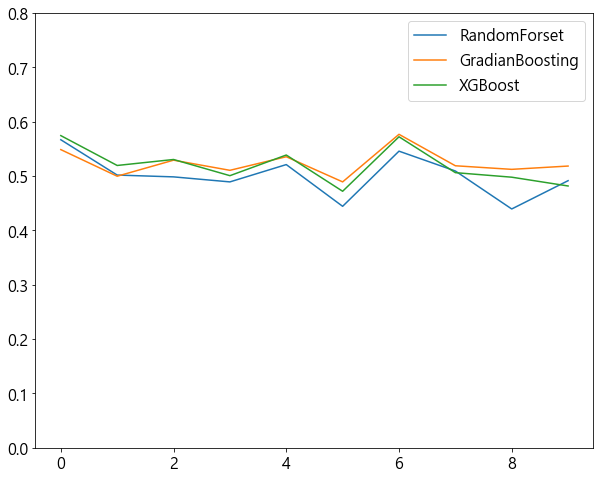

In [39]:
# 그래프를 보고 편차가 심하지 않은것을 찾음 
# x축은 교차 검증 번호

# plt.plot(r0, label='LinearRegression')
# plt.plot(r1, label='KNN')
# plt.plot(r2, label='Ridge')
# plt.plot(r3, label='Lasso')
# plt.plot(r4, label='ElasticNet')
# plt.plot(r5, label='SVR')
# plt.plot(r6, label='DecisionTree')
plt.plot(r7, label='RandomForset')
plt.plot(r8, label='GradianBoosting')
plt.plot(r9, label='XGBoost')

plt.legend()
plt.ylim(0,0.8)
plt.show()

### 모든 모델에 데이터를 학습시킨다

In [42]:
best1.fit(x, y)
best2.fit(x, y)
best3.fit(x, y)
best4.fit(x, y)
best5.fit(x, y)
best6.fit(x, y)
best7.fit(x, y)
best8.fit(x, y)
best9.fit(x, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=12, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, silent=True, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=0)

### 예측 결과를 추출한다.

In [44]:
pred1 = best1.predict(x)
pred2 = best2.predict(x)
pred3 = best3.predict(x)
pred4 = best4.predict(x)
pred5 = best5.predict(x)
pred6 = best6.predict(x)
pred7 = best7.predict(x)
pred8 = best8.predict(x)
pred9 = best9.predict(x)

### 그래프를 통해 예측값과 실제값 비교

In [65]:
# y의 인덱스를 다시 설정한다.
y = y.values

### KNN

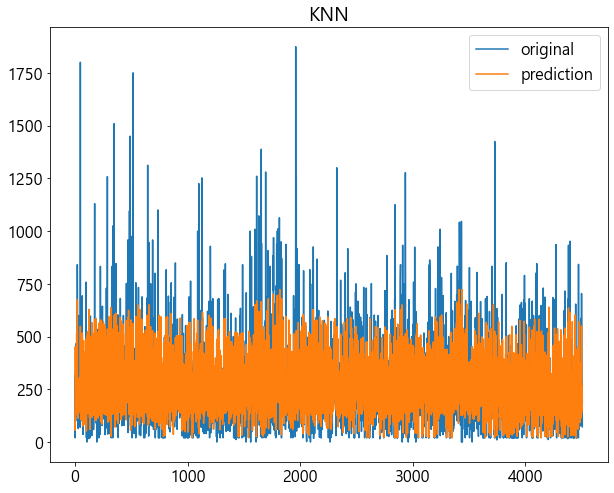

In [66]:
plt.plot(y, label='original')
plt.plot(pred1, label='prediction')
plt.title('KNN')
plt.legend()
plt.show()

### GradianBoosting

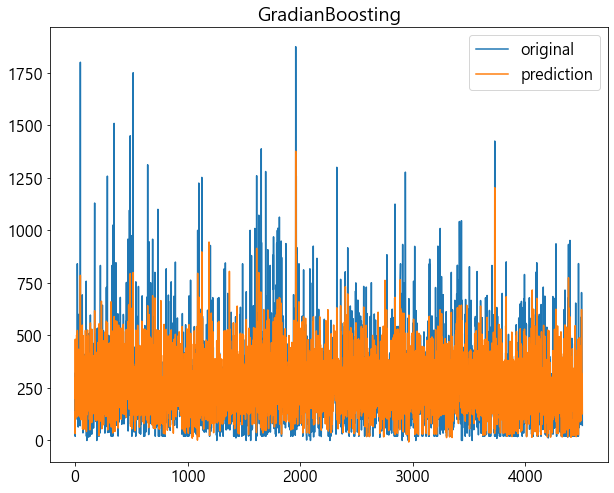

In [67]:
plt.plot(y, label='original')
plt.plot(pred8, label='prediction')
plt.title('GradianBoosting')
plt.legend()
plt.show()

### XGBoost

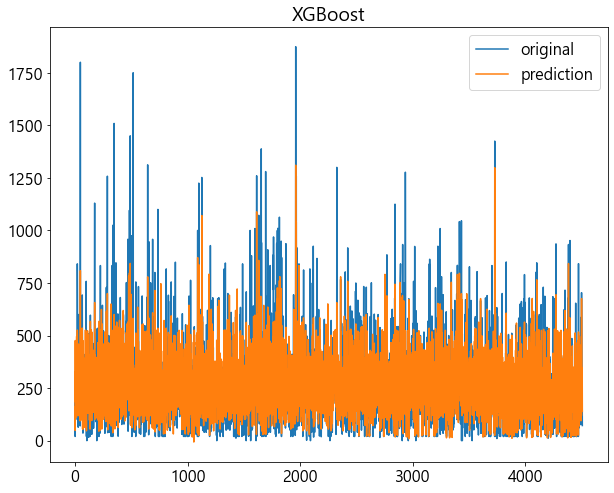

In [68]:
plt.plot(y, label='original')
plt.plot(pred9, label='prediction')
plt.title('XGBoost')
plt.legend()
plt.show()

### 예측결과

In [71]:
x2 = test_df.drop(['평균임금'],axis=1)

In [75]:
# 표준화
x2 = scaler1.transform(x2)
x2

array([[  -0.85955401, -139.22218593,   -1.31387019,   -1.26072703,
          -1.82341594,   -2.26768695],
       [  -0.85955401, -139.17737122,   -1.31387019,   -1.26072703,
          -1.82341594,   -2.26768695],
       [  -4.86817411, -139.16243299,   -1.31387019,   -1.26072703,
          -1.82341594,   -2.26768695],
       ...,
       [  -0.85955401, -138.94333888,   -0.24774593,   -5.29168894,
          -1.82341594,   -1.31639209],
       [  -0.85955401, -138.91346241,   -0.24774593,   -5.29168894,
          -1.93457099,   -1.31639209],
       [  -4.86817411, -138.89852417,   -2.0246197 ,   -5.29168894,
          -1.82341594,   -1.31639209]])

In [76]:
pred = best8.predict(x2)
pred

array([644.58548258, 644.58548258, 644.58548258, ..., 571.20059992,
       571.20059992, 644.58548258])

### 원본 데이터에 예측 결과 넣기

In [86]:
df1.loc[test_df.index,'평균임금'] = pred
df1

,성별,출생년도,혼인상태,종교유무,직종,평균임금,지역
0,2,1936,2,2,9999.0,644.585483,1
1,2,1945,2,2,9999.0,644.585483,1
2,1,1948,2,2,9999.0,644.585483,1
3,1,1942,3,1,762.0,108.900000,1
4,2,1923,2,1,9999.0,644.585483,1
...,...,...,...,...,...,...,...
15417,2,1967,1,1,952.0,644.585483,5
15418,2,1992,5,1,9999.0,571.200600,5
15419,1,1995,5,1,521.0,72.000000,5
15420,2,1998,5,1,432.0,571.200600,5


## 상관관계가 적은 컬럼을 제거 후 학습

In [89]:
df2 = df1.drop(['종교유무','혼인상태','지역'],axis=1)

In [91]:
# 결측치 처리
df2['성별'].fillna(9 ,inplace=True)
df2['출생년도'].fillna(9999 ,inplace=True)
df2['직종'].fillna(9999 ,inplace=True)

df2.isna().sum()

성별          0
출생년도        0
직종          0
평균임금    10915
dtype: int64

In [92]:
# 평균 임금이 결측인 사람과 그렇지 않은 사람으로 나눈다.
idx1 = df2.query('평균임금 == "NaN"').index
test_df = df2.iloc[idx1]

idx2 = df2.query('평균임금 != "NaN"').index
train_df = df2.iloc[idx2]

In [93]:
x = train_df.drop('평균임금',axis=1)
y = train_df['평균임금']

display(x)
display(y)

,성별,출생년도,직종
3,1,1942,762.0
10,2,1940,999.0
16,1,1978,312.0
17,2,1975,254.0
24,1,1975,286.0
...,...,...,...
15400,1,1966,874.0
15401,2,1962,899.0
15404,2,1993,411.0
15412,1,1956,854.0


3        108.9
10        20.0
16       322.0
17       120.0
24       300.0
         ...  
15400    230.0
15401    138.0
15404    286.0
15412    179.0
15419     72.0
Name: 평균임금, Length: 4507, dtype: float64

In [94]:
# 표준화
scaler1 = StandardScaler()
scaler1.fit(x)
x = scaler1.transform(x)

In [95]:
# 결과 데이터를 보고 분류 (회귀에서는 KFold사용)
fold1=KFold(n_splits=10, shuffle=True, random_state=1)

In [96]:
params={
    # 트리의 개수
    'n_estimators':[i for i in range(0,201,50)],
    # 질문 깊이
    'max_depth':[None,1,2,3,4,5,6,7,8,9,10]
}

model8 = GradientBoostingRegressor()
grid8 = GridSearchCV(model8, param_grid=params, scoring='r2', cv=fold1)
grid8.fit(x,y)
print(f'최적의 하이퍼 파라미터 : {grid8.best_params_}')
print(f'최적의 모델 평균 성능 : {grid8.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': 4, 'n_estimators': 150}
최적의 모델 평균 성능 : 0.5081108216388849


In [97]:
params={
    # 트리의 개수
    'n_estimators':[i for i in range(0,201,50)],
    # 질문 깊이
    'max_depth':[None,1,2,3,4,5,6,7,8,9,10]
}

model9 =  XGBRegressor(silent=True, verbosity=0, tree_method='gpu_hist') # gpu 사용하여 정확도를 끌어올릴수 있음
grid9 = GridSearchCV(model9, param_grid=params, scoring='r2', cv=fold1)
grid9.fit(x,y)
print(f'최적의 하이퍼 파라미터 : {grid9.best_params_}')
print(f'최적의 모델 평균 성능 : {grid9.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': 3, 'n_estimators': 50}
최적의 모델 평균 성능 : 0.5020721242974016
